In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sympy as sp

# Define the transition matrix
q = 0.5
r = 0.5

P = np.array([
    [0, r, 0, q],
    [q, 0, r, 0],
    [0, q, 0, r],
    [r, 0, q, 0]
])



In [11]:
P_sym = sp.Matrix(P)
eigenvals = P_sym.eigenvals()
eigenvecs = P_sym.eigenvects()

# Print the eigenvalues and eigenvectors
print("Eigenvalues:", eigenvals)
print("Eigenvectors:", eigenvecs)


Eigenvalues: {0: 1, -1.00000000000000: 1, 2.67050010114123e-33: 1, 1.00000000000000: 1}
Eigenvectors: [(0, 1, [Matrix([
[ 0.707106781186548],
[                 0],
[-0.707106781186548],
[                 0]])]), (-1.00000000000000, 1, [Matrix([
[-0.5],
[ 0.5],
[-0.5],
[ 0.5]])]), (2.67050010114123e-33, 1, [Matrix([
[1.00148357108136e-32],
[   0.707106781186548],
[7.70371977754894e-33],
[  -0.707106781186548]])]), (1.00000000000000, 1, [Matrix([
[0.5],
[0.5],
[0.5],
[0.5]])])]


In [12]:
print(eigenvecs[3][2]) #this gives a strange tuple, so we need to unpack it

[Matrix([
[0.5],
[0.5],
[0.5],
[0.5]])]


In [13]:
w_a, w_b, w_c, w_d = eigenvecs[3][2][0]

In [14]:
print(w_a, w_b, w_c, w_d)

0.500000000000000 0.500000000000000 0.500000000000000 0.500000000000000


In [15]:
#oppure, in modo più generale

In [16]:
for eigenvector in eigenvecs:
    if eigenvector[0] == 1:
        eigenvector1_components = eigenvector[2][0]  # extract the eigenvector components as a list
        w_a, w_b, w_c, w_d = eigenvector1_components  # assign the components to the variables w_a and w_b
        break  # exit the loop once we've found the eigenvector
        
print(w_a, w_b, w_c, w_d)

0.500000000000000 0.500000000000000 0.500000000000000 0.500000000000000


In [17]:
# we need to normalize them

norm = w_a + w_b + w_c + w_d
w_a /= norm
w_b /= norm
w_c /= norm
w_d /= norm

print("the expected value are: \nP_a(inf) = {} \nP_b(inf) = {} \nP_c(inf) = {} \nP_d(inf) = {}".format(w_a, w_b, w_c, w_d))

the expected value are: 
P_a(inf) = 0.250000000000000 
P_b(inf) = 0.250000000000000 
P_c(inf) = 0.250000000000000 
P_d(inf) = 0.250000000000000


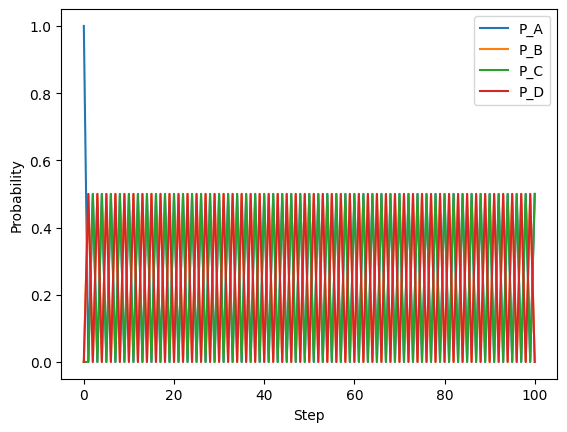

In [18]:
# Define the initial state
x = np.array([1, 0, 0, 0])  # all systems start in state A

#Define the number of iterations
n_steps = 100

# Iterate the stochastic matrix
P_a = [x[0]]
P_b = [x[1]]
P_c = [x[2]]
P_d = [x[3]]
for i in range(n_steps):
    x = np.dot(P, x.T)
    P_a.append(x[0])
    P_b.append(x[1])
    P_c.append(x[2])
    P_d.append(x[3])

# Plot the results
plt.plot(P_a, label='P_A')
plt.plot(P_b, label='P_B')
plt.plot(P_c, label='P_C')
plt.plot(P_d, label='P_D')
plt.xlabel('Step')
plt.ylabel('Probability')
plt.legend()
plt.show()